In [3]:
'''
In chapter 20 of the Machine Learning with Python Cookbook, implement the code found in section 20.15 classify MSINT images using a convolutional neural network. Report the accuracy of your results.
'''

'\nIn chapter 20 of the Machine Learning with Python Cookbook, implement the code found in section 20.15 classify MSINT images using a convolutional neural network. Report the accuracy of your results.\n'

In [4]:
# Classify images using the convolutional layer
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [5]:
# Set that the color channel value will be first
K.set_image_data_format("channels_first")

In [6]:
# Set feed
np.random.seed(0)

In [7]:
# Set image information
channels = 1
height = 28
width = 28


In [8]:
# Load data and target from MNIST data
(data_train, target_train),(data_test, target_test) = mnist.load_data()


In [9]:
# Reshape training image data into features
data_train = data_train.reshape(data_train.shape[0], channels,height,width)

In [10]:
# Reshape test image data into features
data_test = data_test.reshape(data_test.shape[0], channels, height, width)

In [11]:
# Rescale pixel intensity to between 0 and 1
features_train = data_train / 255
features_test = data_test / 255

In [12]:
# One-hot encode target
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]

In [13]:
# Start neural network
network = Sequential()

In [14]:
# Add convolutional layer with 64 filters, a 5x5 window, and ReLU activation function
network.add(Conv2D(filters=64,
                   kernel_size=(5, 5),
                   input_shape=(channels, width, height),
                   activation='relu'))

In [15]:
# Add max pooling layer with a 2x2 window
network.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
# Add dropout layer
network.add(Dropout(0.5))

In [17]:
# Add layer to flatten input
network.add(Flatten())

In [18]:
# # Add fully connected layer of 128 units with a ReLU activation function
network.add(Dense(128, activation="relu"))

In [19]:
# Add dropout layer
network.add(Dropout(0.5))

In [20]:
# Add fully connected layer with a softmax activation function
network.add(Dense(number_of_classes, activation="softmax"))

In [21]:
# Compile neural network
network.compile(loss="categorical_crossentropy", # Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) # Accuracy performance metric

In [22]:
# Train neural network
history = network.fit(features_train, # Features
            target_train, # Target
            epochs=3, # Number of epochs
            verbose=1, # Do print description after each epoch
            batch_size=1000, # Number of observations per batch
            validation_data=(features_test, target_test)) # Data for evaluation

Epoch 1/3
60/60 [==============================] - 44s 729ms/step - loss: 0.6030 - accuracy: 0.8100 - val_loss: 0.1828 - val_accuracy: 0.9467
Epoch 2/3
60/60 [==============================] - 42s 692ms/step - loss: 0.2099 - accuracy: 0.9377 - val_loss: 0.1017 - val_accuracy: 0.9705
Epoch 3/3
60/60 [==============================] - 39s 651ms/step - loss: 0.1422 - accuracy: 0.9578 - val_loss: 0.0767 - val_accuracy: 0.9766


In [23]:
# Evaluating the model

loss, accuracy = network.evaluate(features_train, target_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = network.evaluate(features_test, target_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9753
Testing Accuracy:  0.9766


In [24]:
# In scikit-learn the fit method returned a trained model, but in keras the fit method returns a History object containing the loss values and performance metrics at each epoch.
# Get the training and test loss histories

training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# training_loss

In [25]:
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
#epoch_count

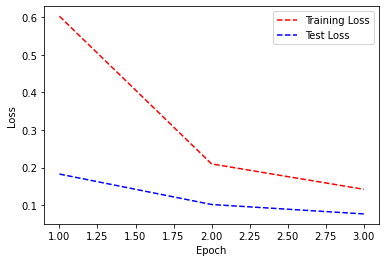

In [26]:
# Visualize loss history
import matplotlib.pyplot as plt

plt.plot(epoch_count,training_loss, "r--")
plt.plot(epoch_count, test_loss, "b--")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [27]:
# Showing the accuracy for the last epoch-the final epoch
training_accuracy = history.history["accuracy"][4]
test_accuracy = history.history["val_accuracy"][4]

print("Training Accuracy :" ,training_accuracy)
print("Test Accuracy :" ,test_accuracy)

IndexError: list index out of range